# IA & Chatbots: Global Solution

Entregáveis:

1.	**Modelo Descritivo:** Façam a análise exploratória de dados da fome (com ao menos 3 gráficos e 3
estatísticas) com dados de índice de fome de 2014 até 2022, disponíveis em:
https://www.kaggle.com/datasets/parasharmanas/global-hunger-index-2022-trends. Verifiquem se existem
possíveis agrupamentos nos dados e como isso muda as estatísticas. (3.5 pontos)


2.	**Modelo Preditivo:** Treine um modelo de regressão para predizer Value (tamanho da produção) a partir de
Year com dados de produção de colheitas de vários países do mundo:
https://www.kaggle.com/datasets/pranav941/-world-food-wealth-bank. Faça o treino usando: (a) dados de
todos os países e (b) dados apenas do Brasil. Após isso, discuta: o modelo de Machine Learning aponta um
cenário otimista para o futuro? Qual a predição de produção para 2030? e 2050? (3.5 pontos)

3.	**Modelo Generativo:** em células markdown, discuta "como o ChatGPT e a Inteligência Artificial poderiam ser
aplicados no combate à fome?". Apresente uma solução que utilize um Modelo Generativo de Linguagem
(LLMs, Large Language Models, modelos de linguagem grandes generativos, como o ChatGPT) e/ou Modelos
Generativos de Imagens (como Midjourney e DALL-E). Considere que, apesar do ChatGPT ser uma ferramenta
bastante interessante, existe um problema que os modelos LLMs enfrentam, chamado de Alucinação: os
modelos generativos afirmam com confiança fatos que não parecem ser justificados por seus dados de
treinamento. Discuta como isso poderia afetar o uso de modelos generativos no problema. Compare com os
modelos descritivos e preditivos. (3 pontos)


Turma - 

Insira os nomes e RM na célula abaixo:

--------------------------

In [ ]:
# Nomes e RM:
# Bruna Menegatti Vienna - RM 96848
# Kaue Caponero Figueiredo - RM 96466
# Mariana Santos Fernandes de Sousa - RM 97503

# Exercício 1 - Modelo Descritivo

---



Façam a análise exploratória de dados da fome (com ao menos 3 gráficos e 3
estatísticas) com dados de índice de fome de 2014 até 2022, disponíveis em:
https://www.kaggle.com/datasets/parasharmanas/global-hunger-index-2022-trends. Verifiquem se existem
possíveis agrupamentos nos dados e como isso muda as estatísticas. (3.5 pontos)

In [47]:
import pandas as pd

import matplotlib.pyplot as plt  
import seaborn as sns

from sklearn.cluster import KMeans
import numpy as np

from sklearn.metrics import adjusted_rand_score, silhouette_score

import statistics

In [3]:
from google.colab import files
uploaded = files.upload()

Saving dataset_hunger.csv to dataset_hunger.csv


In [4]:
dados = pd.read_csv("dataset_hunger.csv", sep=',', encoding='latin-1')

# Removendo a primeira linha que vem com dados inválidos como NaN
dados = dados.drop(0)

In [5]:
# removendo os caracteres "<" e fazendo a média dos que tem o caractere "-" para 
# converter em todas as colunas numéricas (todas, menos a do nome do país)

colunas_a_converter = ['2000', '2007', '2014', '2022']

for coluna in colunas_a_converter:
    dados[coluna] = dados[coluna].str.replace('<', '')
    dados[coluna] = dados[coluna].str.replace('–', '-').str.replace('\x96', '-').str.split('-').apply(lambda x: (float(x[0]) + float(x[1])) / 2 if len(x) == 2 else float(x[0]))
    dados[coluna] = pd.to_numeric(dados[coluna], errors='coerce')

In [6]:
dados.head()

,Rank in 2022,Country,2000,2007,2014,2022,Absolute change,Percent change
1,1.0,Belarus,5.0,5.0,5.0,5.0,0,0
2,1.0,Bosnia and Herzegovina,9.3,6.6,5.0,5.0,0,0
3,1.0,Chile,5.0,5.0,5.0,5.0,0,0
4,1.0,China,13.3,7.8,5.0,5.0,0,0
5,1.0,Croatia,5.0,5.0,5.0,5.0,0,0


# **Gráfico 01: Distribuição dos Índices de Fome em 2022**:


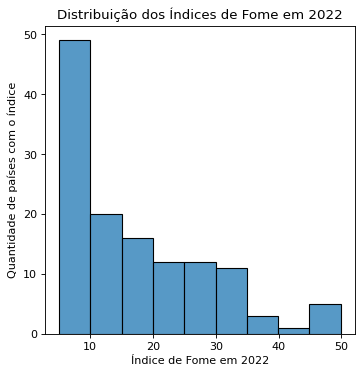

In [8]:
plt.figure(figsize = (5, 5), dpi = 80)
sns.histplot(data = dados, x = '2022')
plt.xlabel('Índice de Fome em 2022')
plt.ylabel('Quantidade de países com o índice')
plt.title('Distribuição dos Índices de Fome em 2022')
plt.show()

# **Gráfico 02 (gráfico de barras): Ranking - TOP 10 países com maior Índice de Fome em 2022 e seus índices**:



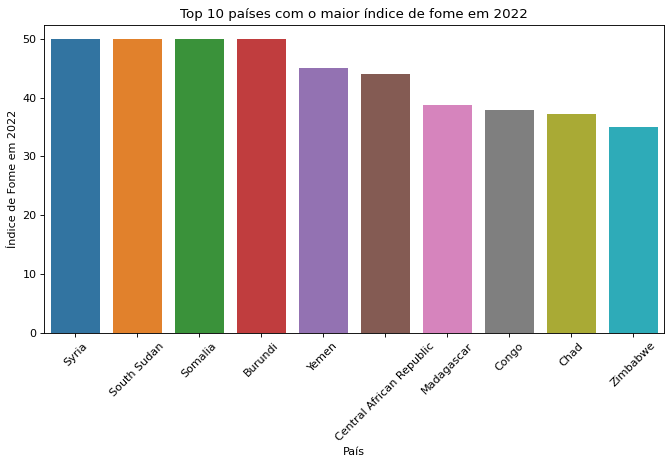

In [9]:
# Gráfico mostrando os 10 países com maior índice de fome em 2022
plt.figure(figsize = (10, 5), dpi = 80)
top_countries_rank = dados.sort_values('2022', ascending=False).head(10)
sns.barplot(data = top_countries_rank, x = 'Country', y = '2022')
plt.xlabel('País')
plt.ylabel('Índice de Fome em 2022')
plt.title('Top 10 países com o maior índice de fome em 2022')
plt.xticks(rotation=45)
plt.show()

# **Gráfico 03 (gráfico de linha): Evolução do índice de Fome ao passar dos anos dos países que tiveram uma posição elevada no ranking de fome em 2022**:

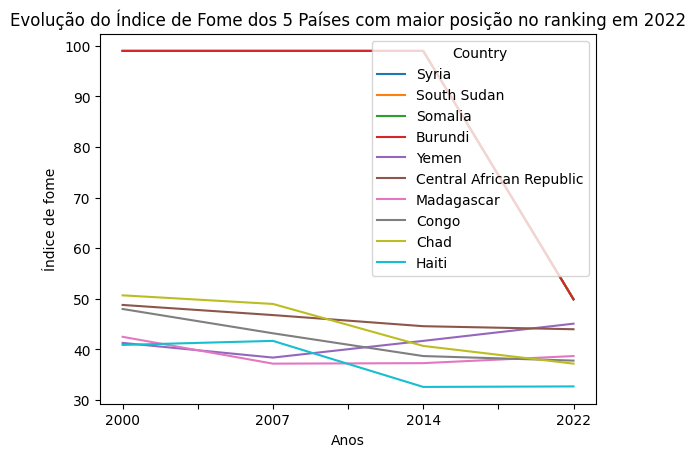

In [10]:
# Gráfico mostrando o crescimento do índice de fome nos países com maior evolução na coluna "Absolute Change"
dados_filtrados = dados.sort_values('Rank in 2022', ascending=False).head(10)
df_grafico = dados_filtrados[['Country', '2000', '2007', '2014', '2022']]
df_grafico.set_index('Country', inplace=True)
df_grafico = df_grafico.T
df_grafico.plot()
plt.xlabel('Anos')
plt.ylabel('Índice de fome')
plt.title('Evolução do Índice de Fome dos 5 Países com maior posição no ranking em 2022')
plt.show()

# **Gráfico 04 (gráfico de dispersão): Relação entre as colunas: mudança percentual e mudança absoluta**:

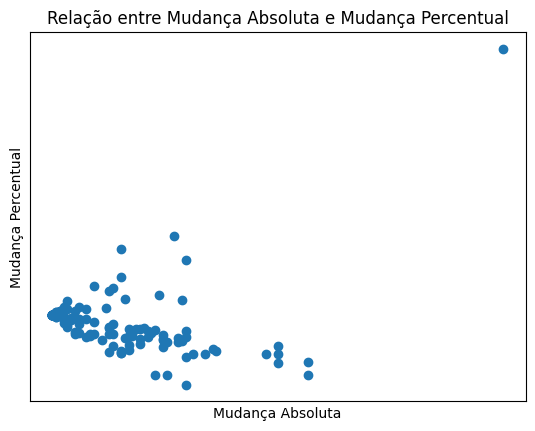

In [66]:
# plt.figure(figsize = (20, 5), dpi = 80)
plt.scatter(dados['Absolute change'], dados['Percent change'])

plt.xlabel('Mudança Absoluta')
plt.ylabel('Mudança Percentual')
plt.title('Relação entre Mudança Absoluta e Mudança Percentual')

plt.xticks([])
plt.yticks([])

plt.show()

# **Gráficos 05: gráfico de pares que mostra a relação entre todas as combinações possíveis de variáveis numéricas no DataFrame dados**:

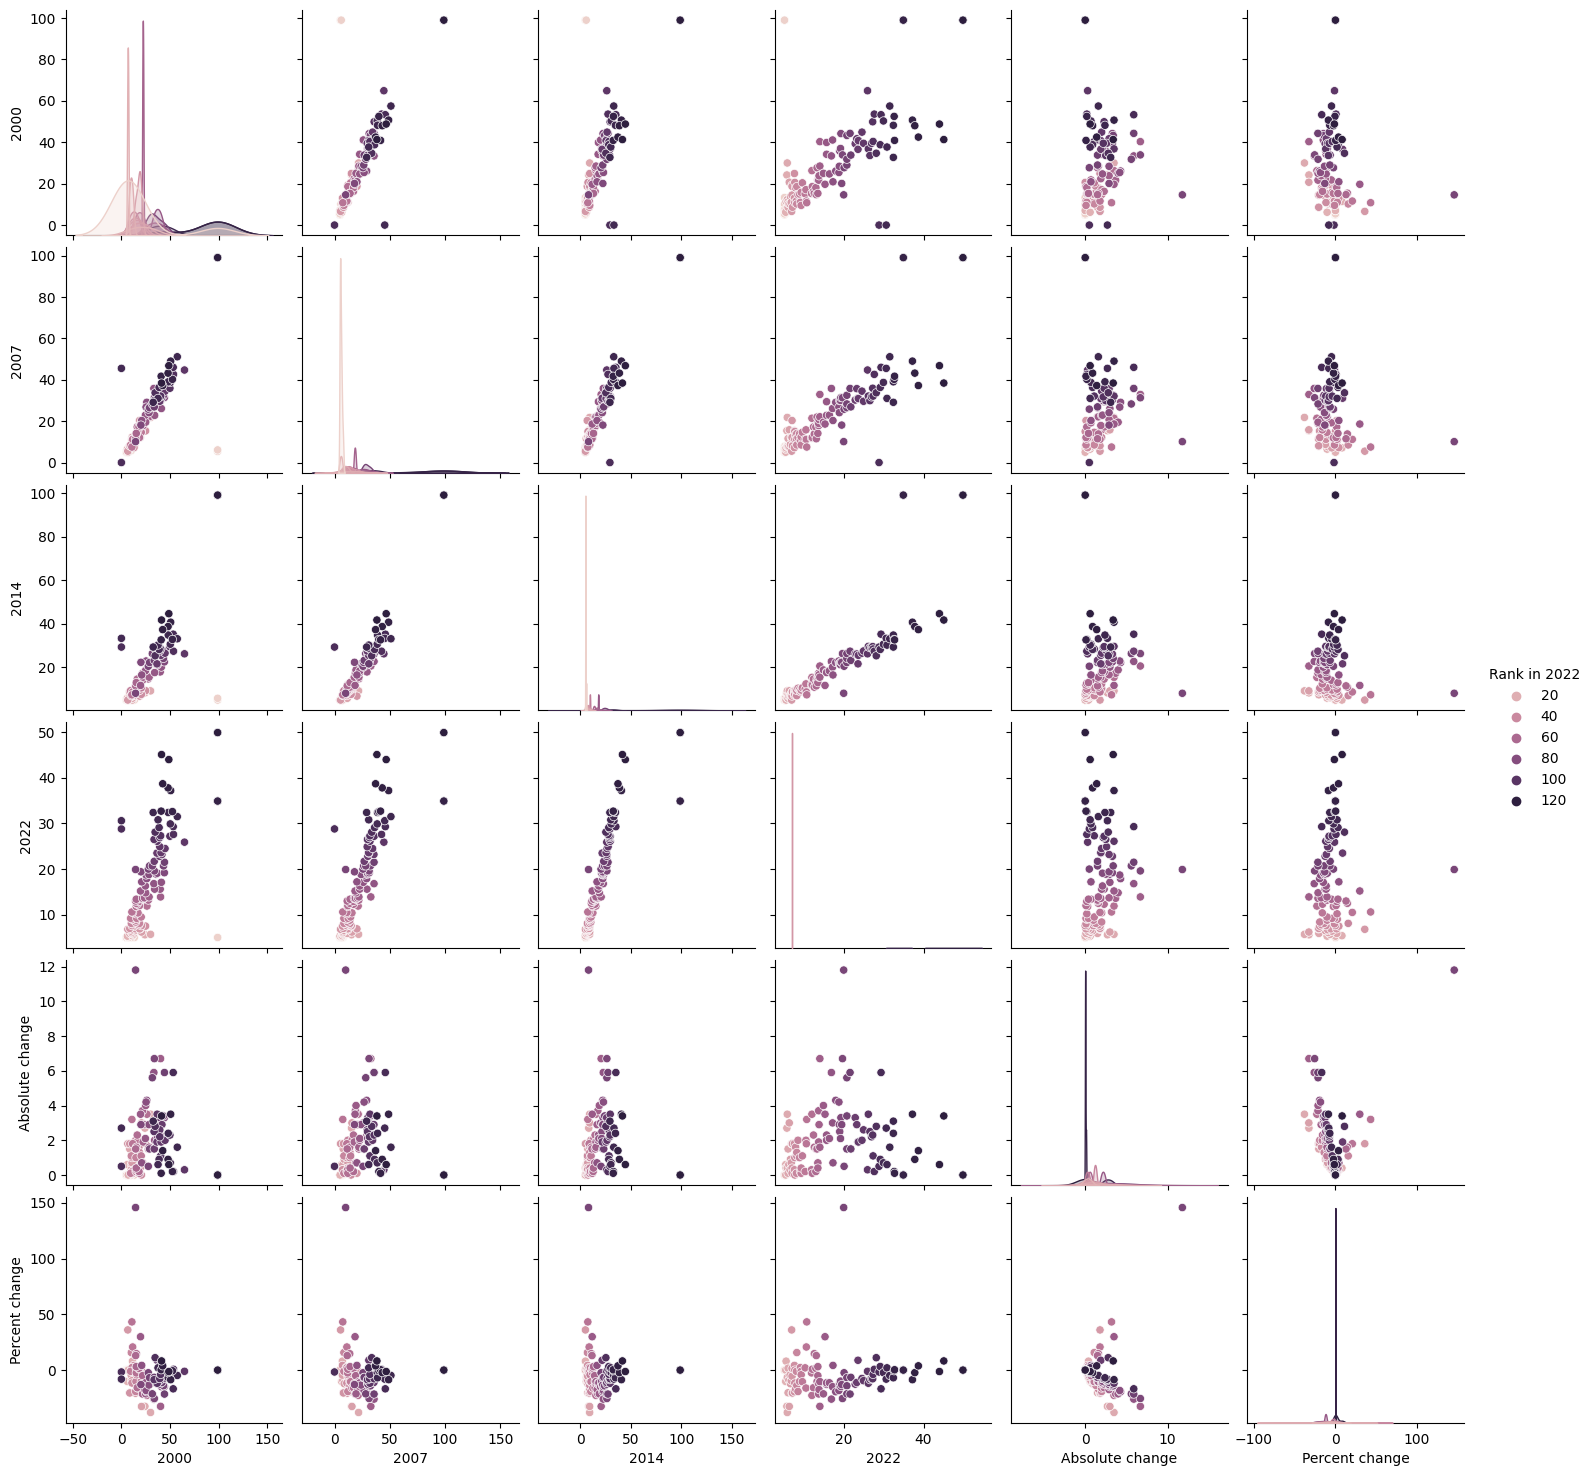

In [67]:
sns.pairplot(dados, hue='Rank in 2022')

# Verificando se os dados podem ser agrupados:



<ipython-input-55-304bc5bd219f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_cluster.dropna(inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


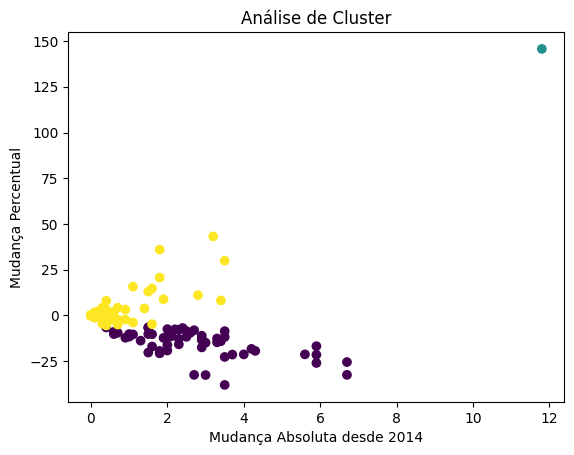

In [55]:
# Limpando dados inválidos
dados['Percent change'] = dados['Percent change'].apply(lambda x: np.nan if x == '.7.5' or x == '10..6' else x)
dados['Percent change'] = dados['Percent change'].astype(float)

#Separando apenas as colunas que queremos avaliar as mudanças
dados_cluster = dados[['Absolute change', 'Percent change']]

dados_cluster.dropna(inplace=True)

km = KMeans(n_clusters = 3, random_state = 42)
km_c = km.fit_predict(dados_cluster)

plt.scatter(dados_cluster['Absolute change'], dados_cluster['Percent change'], c = labels, cmap = 'viridis')

plt.xlabel('Mudança Absoluta desde 2014')
plt.ylabel('Mudança Percentual')
plt.title('Análise de Cluster')

plt.show()

##Análise de agrupamento:
---

#####O primeiro grupo, representado pela cor **roxa**, possui uma faixa de mudança absoluta dos índices de fome variando de 0 a 7. A mudança percentual nesse grupo varia de -25% a 0%. Isso indica que, apesar da mudança percentual ser baixa, os países nesse grupo têm um **índice de fome maior em comparação com os outros países**. Ou seja, mesmo com variações menores na porcentagem de mudança, os índices de fome desses países são relativamente altos.

##### O segundo grupo, representado pela cor **amarela**, apresenta uma faixa de mudança absoluta dos índices de fome variando de 0 a 4. A mudança percentual nesse grupo varia de 0% a 50%. Isso indica que, apesar da mudança percentual ser um valor significativo, os pontos de mudança não apresentam uma variação tão ampla. Isso sugere que os países nesse grupo têm um **índice de fome menor em comparação com os países do primeiro grupo**. Mesmo com variações mais expressivas na porcentagem de mudança, os índices de fome desses países são relativamente baixos.



# **Estatística 01:**

Calculando a média do índice de fome para cada ano para visualizar a tendência geral ao longo dos anos:

In [49]:
indices_fome_ano = [dados['2000'], dados['2007'], dados['2014'], dados['2022']]
medias = [statistics.mean(ano) for ano in indices_fome_ano]

print(medias)

[30.132558139534883, 25.25736434108527, 21.63953488372093, 17.17062015503876]


# **Estatística 02:**

Calculando o desvio padrão do índice de fome para cada ano a fim de medir a dispersão dos dados ao redor da média:

In [56]:
desvios_padrao = [statistics.stdev(ano) for ano in indices_fome_ano]

print(desvios_padrao)

[24.697609204861237, 22.666411601178318, 22.37223592775154, 11.812894925735419]


# **Estatística 03:**

Calculando o coeficiente de variação do desvio padrão em relação à média:

In [57]:
coef_variacao = [(desvio_padrao / media) * 100 for media, desvio_padrao in zip(medias, desvios_padrao)]

print(coef_variacao)

[81.96320103488718, 89.7417929087227, 103.38593711910976, 68.79713614926656]


# **Estatística 04:**

Calcular o coeficiente de correlação entre o índice de fome e o ranking do país para cada ano a fim de visualizar como o ranking está relacionado ao índice de fome.

In [60]:
coef_correlacao = []
for ano in ['2000', '2007', '2014', '2022']:
    coef = dados[ano].corr(dados['Rank in 2022'])
    coef_correlacao.append(coef)

for i, ano in enumerate(['2000', '2007', '2014', '2022']):
    print(f"Coeficiente de correlação em {ano}: {coef_correlacao[i]}")

Coeficiente de correlação em 2000: 0.6231862390149202
Coeficiente de correlação em 2007: 0.7531506327610704
Coeficiente de correlação em 2014: 0.7232989728129431
Coeficiente de correlação em 2022: 0.9236330298294341


# Exercício 2 - Modelo Preditivo
---
Treine um modelo de regressão para predizer Value (tamanho da produção) a partir de
Year com dados de produção de colheitas de vários países do mundo:
https://www.kaggle.com/datasets/pranav941/-world-food-wealth-bank. Faça o treino usando: 

*   dados de todos os países e 
*   dados apenas do Brasil. 

Após isso, discuta: o modelo de Machine Learning aponta um
cenário otimista para o futuro? Qual a predição de produção para 2030? e 2050?

In [61]:
#upload do primeiro csv
uploaded = files.upload()

Saving food-wealth-bank-1.csv to food-wealth-bank-1.csv


In [63]:
#upload do segundo csv
uploaded = files.upload()

Saving food-wealth-bank-2.csv to food-wealth-bank-2.csv


In [118]:
dados_prod_colheita = pd.read_csv("food-wealth-bank-1.csv", sep=',', encoding='latin-1')

# Removevendo linhas com valores ausentes
dados_prod_colheita.dropna(subset=['Value'], inplace=True)

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr

In [119]:
# Escolhendo as colunas preditivas e alvo
X = dados_prod_colheita['Year'].values.reshape(-1, 1)
y = dados_prod_colheita['Value'].values # Classe alvo

In [121]:
# Dividindo conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.9, random_state = 42)

len(X_train), len(X_test), len(y_train), len(y_test)

(12019, 108175, 12019, 108175)

In [122]:
# Treinando o modelo de regressão linear
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [123]:
# Fazendo previsões para os dados de teste
y_predicoes = lr.predict(X_test)

In [124]:
# Avaliar o desempenho do modelo
MAE = mean_absolute_error(y_true = y_test,      # Gabarito
                         y_pred = y_predicoes)  # Respostas do algoritmo ao teste realizado
print('MAE: ', MAE)

MSE = mean_squared_error(y_true = y_test,       # Gabarito
                         y_pred = y_predicoes)  # Respostas do algoritmo ao teste realizado
print('MSE: ', MSE)
print('raiz MSE: ', MSE**0.5)

R2 = r2_score(y_true = y_test,                  # Gabarito
              y_pred = y_predicoes)             # Respostas do algoritmo ao teste realizado
print('R2: ', R2)  # Quanto mais próximos de 1 melhor

MAE:  16644665.841537505
MSE:  3463113823845565.5
raiz MSE:  58848227.02380732
R2:  0.00022058292856352857


In [126]:
# Fazendo previsões para 2030 e 2050 usando todos os países
previsao_2030_all = lr.predict([[2030]])
previsao_2050_all = lr.predict([[2050]])

print("2030:", previsao_2030_all[0])
print("2050:", previsao_2050_all[0])

2030: 14770435.575987637
2050: 17286042.556978613


In [128]:
# Filtrando os dados apenas para o Brasil
dados_prod_colheita_brasil = dados_prod_colheita[dados_prod_colheita['Area'] == 'Brazil']

X_brasil = dados_prod_colheita_brasil['Year'].values.reshape(-1, 1)
y_brasil = dados_prod_colheita_brasil['Value'].values.reshape(-1, 1)

Previsão de produção usando apenas dados do Brasil:
2030: [29122040.05696249]
2050: [34803140.20394778]


In [129]:
# Dividindo conjunto de treinamento e conjunto de teste
X_train_br, X_test_br, y_train_br, y_test_br = train_test_split(X_brasil, y_brasil, test_size = 0.9, random_state = 42)

len(X_train_br), len(X_test_br), len(y_train_br), len(y_test_br)

(72, 648, 72, 648)

In [130]:
lr_brasil = LinearRegression()
lr_brasil.fit(X_brasil, y_brasil)

LinearRegression()

In [131]:
# Fazendo previsões para os dados de teste
y_predicoes_br = lr_brasil.predict(X_test_br)

In [132]:
# Avaliar o desempenho do modelo
MAE = mean_absolute_error(y_true = y_test_br,      # Gabarito
                         y_pred = y_predicoes_br)  # Respostas do algoritmo ao teste realizado
print('MAE: ', MAE)

MSE = mean_squared_error(y_true = y_test_br,       # Gabarito
                         y_pred = y_predicoes_br)  # Respostas do algoritmo ao teste realizado
print('MSE: ', MSE)
print('raiz MSE: ', MSE**0.5)

R2 = r2_score(y_true = y_test_br,                  # Gabarito
              y_pred = y_predicoes_br)             # Respostas do algoritmo ao teste realizado
print('R2: ', R2)  # Quanto mais próximos de 1 melhor

MAE:  24717539.03567305
MSE:  1877412059261067.0
raiz MSE:  43329113.29880946
R2:  0.015296938920649206


In [134]:
# Fazendo previsões para 2030 e 2050 usando apenas os dados do Brasil
previsao_2030_brasil = lr_brasil.predict([[2030]])
previsao_2050_brasil = lr_brasil.predict([[2050]])

print("Previsão de produção usando apenas dados do Brasil:")
print("2030:", previsao_2030_brasil[0])
print("2050:", previsao_2050_brasil[0])

Previsão de produção usando apenas dados do Brasil:
2030: [29122040.05696249]
2050: [34803140.20394778]


### Exercício 1.4 - Crie classificadores para predição se uma determinada mulher tem ou não um diagnostico positivo para diabetes. 

Utilize os classificadores abaixo:

- Naive Bayes
- k-vizinhos mais próximos (KNN)
- Máquina de Vetor Suporte (SVM)
- RandomForest


Para cada classificador acima você deve treinar (função fit), realizar predições no conjunto de teste e comparar com os rótulos originais. Avaliar os resultados (obter acurácia e f1-score de cada classificador).

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
# Instanciando o Escalonador
#scaler = StandardScaler()
scaler = MinMaxScaler()

# Treinando o escalonador
scaler.fit(x_train)

# Usando o escalonador treinado para transformar os dados
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
## Coloque seu código aqui (de maneira organizada, dividindo em diferentes células do notebook para cada classificador)
lda = LinearDiscriminantAnalysis()  # Criamos o objeto do classificador (não mudamos nenhum hiperpârametro)

lda.fit(x_train, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento 

LinearDiscriminantAnalysis()

In [ ]:
# Perceba que estamos passando apenas o x de teste, afinal o algoritmo é que nos dira qual é o y 
y_predicoes = lda.predict(x_test) 

In [ ]:
# k-vizinhos mais próximos (KNN)
from sklearn.neighbors import KNeighborsClassifier

# Passo 4 - Treinar o Classificador
knn = KNeighborsClassifier() # Criando classificador (sem nenhum hiperparametro)
knn.fit(x_train, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento 

# Passo 5 - Testar o Classificador
y_predicoes = knn.predict(x_test) 

# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predicoes))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       102
           1       0.59      0.62      0.60        52

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



In [ ]:
# Naive Bayes Gaussiano
from sklearn.naive_bayes import GaussianNB

# Passo 4 - Treinar o Classificador
gnb = GaussianNB()  # Criamos o objeto do classificador (não mudamos nenhum hiperpârametro)
gnb.fit(x_train, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento 

# Passo 5 - Testar o Classificador
y_predicoes = gnb.predict(x_test) 

# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predicoes))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       102
           1       0.67      0.63      0.65        52

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



In [ ]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier

# Passo 4 - Treinar o Classificador
rf = RandomForestClassifier(random_state=42) # Criando classificador (hiperparametro de seed)
rf.fit(x_train, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento 

# Passo 5 - Testar o Classificador
y_predicoes = rf.predict(x_test) 

# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predicoes))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81       102
           1       0.62      0.58      0.60        52

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.74      0.74      0.74       154



In [ ]:
# Máquina de Vetor Suporte
from sklearn.svm import SVC

# Passo 4 - Treinar o Classificador
svm = SVC() # Criando classificador (sem nenhum hiperparametro)
svm.fit(x_train, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento 

# Passo 5 - Testar o Classificador
y_predicoes = svm.predict(x_test) 

# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predicoes))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       102
           1       0.77      0.52      0.62        52

    accuracy                           0.79       154
   macro avg       0.78      0.72      0.74       154
weighted avg       0.78      0.79      0.77       154



### Na célula abaixo, liste os seus resultados obtidos:

In [ ]:
# Resposta:
#Liste os resultados de cada classificadores com suas respectivas acurácias e f1-score.

# Naive Bayes,                     Acurácia = 0.77    , F1-score: Classe 0: 0.83 e Classe 1: 0.65  
# k-vizinhos mais próximos (KNN) , Acurácia = 0.73    , F1-score: Classe 0: 0.79 e Classe 1: 0.60  
# Máquina de Vetor Suporte (SVM),  Acurácia = 0.79    , F1-score: Classe 0: 0.85 e Classe 1: 0.62
# RandomForest,                    Acurácia = 0.74    , F1-score: Classe 0: 0.81 e Classe 1: 0.60

### Exercício1.5 - Qual foi o melhor Classificador (em acurácia como métrica principal e f1-score (para classe 0) que você conseguiu criar? 

Por qual razão você acha que esse classificador em especial funcionou melhor nos dados deste problema?

In [ ]:
# Resposta:

# O melhor classificador em acurácia e F1-score para a classe 0 foi a Máquina de Vetor Suporte (SVM), 
# pois ele tem os maiores valores de acurácia e F1-score

### Exercício 1.6 - O que é explicabilidade? Cite um exemplo de algoritmo classificador com alta explicabilidade.

In [ ]:
# Resposta

# Explicabilidade é a capacidade do modelo de demonstrar seus resultados claramente com o objetivo de ajudar 
# o usuário a tomar as melhores decisões. Regressão linear, regressão logística e árvore de decisão são exemplos de algoritmos
# classificadores de alta explicabilidade

### Exercício 1.7 - Descreva sucintamente os 6 passos da Metodologia de trabalho em ML


In [ ]:
# Resposta
# 1. Análise exploratória: nesse passo "limpamos" e trasformamos todos os dados de acordo com a necessidade.
# 2. Separar dados: selecionar o alvo e as features além de separar em conjuntos de treinamento, teste e validação.
# 3. Transformar os dados: Nessa etapa, é feito o escalonamento em dados numéricos ou Encodings em dados categóricos
# 4. Treinar o algoritmo: Escolher o algoritmo, ajustar os hiperparâmetros e treinar o mesmo.
# 5. Avaliar o desempenho: Escolher as métricas e testar e cima dos dados de teste em ML supervisonada.
# 6. Produção: Aqui é feito o deploy do modelo na aplicação, que envolve outras competências e áreas.